# Geopandas y Municipios 

In [695]:
import pandas as pd
import geopandas as gpd
import get_centroides as georefar
import descartes
import geoplot
import pickle
import matplotlib.pyplot as plt

In [5]:
# Read polygon de provincias de UNCUYO
# source: https://uncuyo.carto.com/tables/provincias_argentinas_polygon/public/map
gpd.read_file('./poligonos/provincias_argentinas_polygon_UNCUYO.geojson')

,cartodb_id,description,name,provincia,id,codpcia,c_indec,id_dyp,geometry
0,1,,,Ciudad Autónoma de Buenos Aires,1,1,2,1,"MULTIPOLYGON (((-58.39007 -34.66230, -58.39037..."
1,3,,,Catamarca,3,3,10,4,"MULTIPOLYGON (((-66.59111 -26.17318, -66.58961..."
2,4,,,Chaco,4,4,22,6,"MULTIPOLYGON (((-62.34757 -24.11021, -62.34407..."
3,5,,,Chubut,5,5,26,7,"MULTIPOLYGON (((-71.77158 -41.99955, -71.67446..."
4,7,,,Corrientes,7,7,18,5,"MULTIPOLYGON (((-58.89298 -27.99935, -58.89182..."
5,8,,,Entre Ríos,8,8,30,8,"MULTIPOLYGON (((-59.66084 -30.34857, -59.65614..."
6,9,,,Formosa,9,9,34,9,"MULTIPOLYGON (((-62.34465 -22.45495, -62.33563..."
7,10,,,Jujuy,10,10,38,10,"MULTIPOLYGON (((-64.44379 -23.63491, -64.44048..."
8,11,,,La Pampa,11,11,42,11,"MULTIPOLYGON (((-65.10672 -34.99768, -65.02612..."
9,12,,,La Rioja,12,12,46,12,"MULTIPOLYGON (((-69.09436 -27.77274, -69.01274..."


In [6]:
# Read poligonos por el IGN
# https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG
gpd.read_file('./poligonos/provincia_IGN.json')

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-70.39345 -36.15526, -70.39325..."
2,3,0,Provincia,Provincia de La Pampa,Provincia,La Pampa,42,Geografía,IGN,"MULTIPOLYGON (((-64.76547 -40.78351, -64.76618..."
3,4,0,Provincia,Provincia de Mendoza,Provincia,Mendoza,50,Geografía,IGN,"MULTIPOLYGON (((-69.12570 -32.00283, -69.12296..."
4,5,0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-67.05547 -31.85605, -67.05000..."
5,6,0,Provincia,Provincia de Córdoba,Provincia,Córdoba,14,Geografía,IGN,"MULTIPOLYGON (((-63.87035 -29.62387, -63.86959..."
6,7,0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-60.27271 -33.26386, -60.27322..."
7,8,0,Provincia,Provincia de Entre Ríos,Provincia,Entre Ríos,30,Geografía,IGN,"MULTIPOLYGON (((-58.58138 -30.16010, -58.58102..."
8,9,0,Provincia,Provincia de San Juan,Provincia,San Juan,70,Geografía,IGN,"MULTIPOLYGON (((-69.62981 -28.39369, -69.62956..."
9,10,0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-68.52083 -27.81988, -68.52011..."


In [38]:
# Importar datos geograficos de GeoRefAr
#GeoRefAr
import requests
import urllib
def request(endpoint , **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/georef/api/"
    url =  f"{API_BASE_URL}{endpoint}?{urllib.parse.urlencode(kwargs)}"
    print(url)

In [28]:
request('localidades', provincia='Buenos Aires', formato = 'shp' )
# No devuelve polygonos solo centroides.

https://apis.datos.gob.ar/georef/api/localidades?provincia=Buenos+Aires&formato=shp


Se ve que el instituto Geografico Nacional cuenta con la base de datos mas completa y mas detalla. Aparte utilizan los codigos del indec para todos sus niveles (localidad, municipio, departamento y provincia) esto sera util para mergear los datos con el output de GeoRefAr

## Importando municipios del IGN

In [7]:
# Instituto Geografico Nacional
# https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG
MUNICIPIO = gpd.read_file('./poligonos/municipio_IGN.json')

In [13]:
MUNICIPIO[MUNICIPIO.nam == 'San Isidro']

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
324,234,0,Municipio,Municipio San Isidro,Municipio,San Isidro,180143,Dirección de Estadística y Censos,Dirección de Estadística y Censos,"MULTIPOLYGON (((-59.35968 -29.46633, -59.35953..."
701,599,0,Municipio,Municipio San Isidro,Municipio,San Isidro,060756,ARBA - Gerencia de Servicios Catastrales,ARBA - Gerencia de Servicios Catastrales,"MULTIPOLYGON (((-58.48032 -34.48861, -58.48036..."


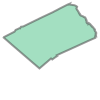

In [37]:
MUNICIPIO[MUNICIPIO.nam == 'San Isidro'].loc[701].geometry

In [42]:
MUNICIPIO.dtypes

gid            int64
entidad        int64
objeto        object
fna           object
gna           object
nam           object
in1           object
fdc           object
sag           object
geometry    geometry
dtype: object

## Merge de los datos aumentados con los poligonos en el nivel municipio

In [356]:
USUARIOS = pickle.load(open('DF_geolocalizado.pickle', 'rb'))
USUARIOS.sample(5)

,nacionalidad,provincia_part,cp_part,loc_part,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,municipio_por_API,departamento_por_API,provincia_por_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,provincia_id_API,departamento_id_API,municipio_id_API
copy_index,,,,,,,,,,,,,,,,,,,,,,
1139,AR,CB,9100,TRELEW,CHUBUT,NO UNICA LOCALIDAD,None,TRELEW,TRELEW,RAWSON,CHUBUT,-43.2484,-65.3104,-43.248944,-65.318117,-43.137223,-65.075725,-43.788623,-68.526759,26,26077,260119
495,AR,BA,1821,DEL VISO,CP INDEFINIDO,CP INDEFINIDO,None,DEL VISO,JOSÉ C. PAZ,JOSÉ C. PAZ,BUENOS AIRES,-34.4805,-58.8043,-34.511876,-58.777671,-34.511876,-58.777671,-36.676942,-60.558832,6,6412,60412
355,AR,BA,2740,ARRECIFES,BUENOS AIRES,NO UNICA LOCALIDAD,None,ARRECIFES,ARRECIFES,ARRECIFES,BUENOS AIRES,-34.0646,-60.1026,-34.011315,-60.062763,-34.011315,-60.062763,-36.676942,-60.558832,6,6077,60077
1299,AR,ER,3180,FEDERAL,ENTRE RÍOS,NO UNICA LOCALIDAD,None,FEDERAL,NO HUBO REQUEST,FEDERAL,ENTRE RÍOS,-30.9513,-58.7851,NaN,NaN,-30.992427,-58.891860,-32.058874,-59.201448,30,30035,None
514,AR,BA,1687,EL PALOMAL,CP INDEFINIDO,CP INDEFINIDO,None,EL PALOMAR,MORÓN,MORÓN,BUENOS AIRES,-34.6177,-58.6015,-34.649141,-58.619843,-34.649141,-58.619843,-36.676942,-60.558832,6,6568,60568


In [151]:
MUNICIPIO.in1 = MUNICIPIO.in1.astype(int)
us_index = USUARIOS.index
us_muni = USUARIOS.merge(MUNICIPIO, left_on= 'municipio_id_API', right_on= 'in1', how = 'left').set_index(us_index).copy()

In [152]:
us_muni = gpd.geodataframe.GeoDataFrame(us_muni)

In [181]:
pd.set_option('display.max_columns', 50)  # Para ver todas las filas
us_muni.drop( columns = ['gid',	'entidad', 'objeto','fna','gna','nam','in1','fdc','sag'], inplace=True)

In [181]:
us_muni[us_muni.provincia_id_API.isna()] # dos datos super incompletos

,nacionalidad,provincia_part,cp_part,loc_part,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,municipio_por_API,departamento_por_API,provincia_por_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,provincia_id_API,departamento_id_API,municipio_id_API,geometry
copy_index,,,,,,,,,,,,,,,,,,,,,,,
1140,AR,CF,1884,None,BUENOS AIRES,NO UNICA LOCALIDAD,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1141,AR,CF,1884,None,BUENOS AIRES,NO UNICA LOCALIDAD,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


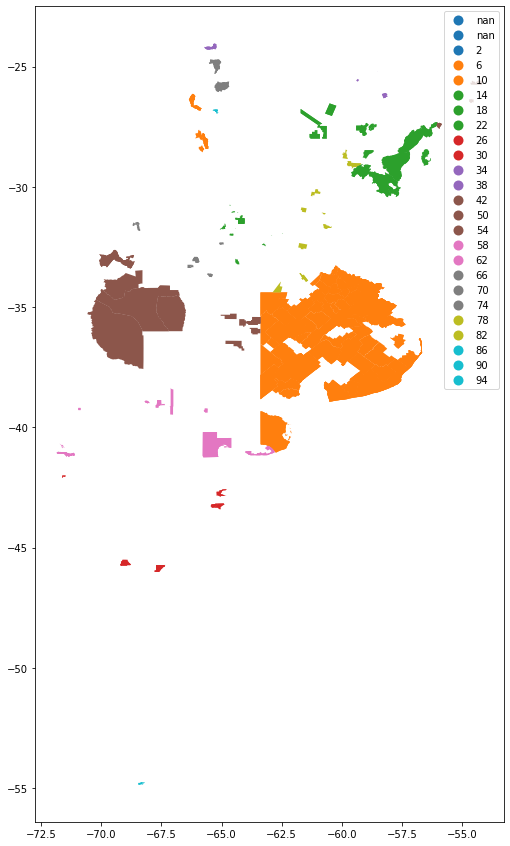

In [318]:
# Elijo una columna random para postear
fig = us_muni[us_muni.provincia_id_API != 'NO HUBO REQUEST'].plot(column = 'provincia_id_API',
                                                                  figsize=(15,15),legend= True)

In [319]:
us_muni_clean = us_muni[(us_muni.provincia_id_API.notna()) &
                        (us_muni.provincia_id_API != 'NO HUBO REQUEST') &
                        (us_muni.municipio_id_API.notna())]
# Vamos a remover los missing y los no request
# Vamos a usar una plantilla de la Republica Argentina
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) #usamos una plantilla

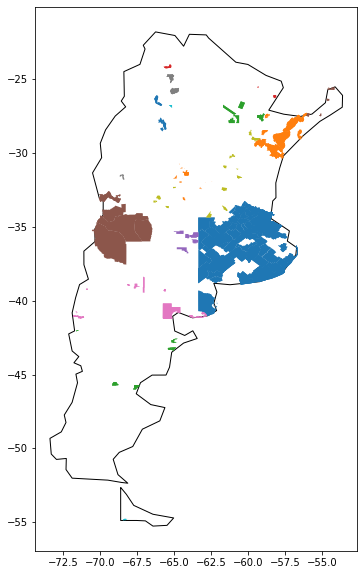

In [320]:
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black', figsize = (10,10))
us_muni_clean.plot(column = 'provincia_id_API', ax = ax, edgecolor='None')

In [419]:
# Parece ser que todo anda bien. En este momento no tengo datos mas alla de la localizacion de los usuarios. 
# Si tuviera algun dato relevante podria intentar plotearlo. Vamos a hacer un simple conteo para contar con datos para agregar.
gby_geo = us_muni_clean.groupby(['municipio_id_API','municipio_por_API']).aggregate('count').sort_values(by = 'nacionalidad', ascending= False).reset_index()
gby_geo['cantidad'] = gby_geo.nacionalidad
gby_geo.sample(2)

,municipio_id_API,municipio_por_API,nacionalidad,provincia_part,cp_part,loc_part,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,departamento_por_API,provincia_por_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,provincia_id_API,departamento_id_API,geometry,cantidad
57,260049,COMODORO RIVADAVIA,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
147,60161,CARMEN DE ARECO,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [342]:
us_muni_cantidad = us_muni_clean.merge(gby_geo.loc[:,['municipio_id_API', 'cantidad']], on = 'municipio_id_API', how='left' )
us_muni_cantidad = gpd.geodataframe.GeoDataFrame(us_muni_cantidad.loc[:,['municipio_por_API','provincia_por_API','cantidad','geometry']])

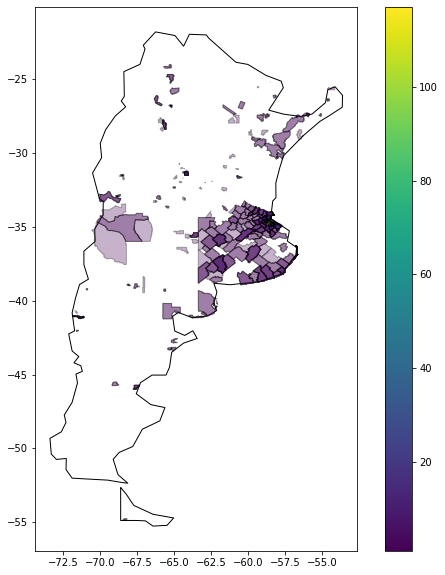

In [343]:
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black', figsize = (10,10))
us_muni_cantidad.plot( column = 'cantidad', ax = ax, alpha = 0.3, edgecolor = 'k', legend = True)

In [352]:
# Solo Buenos Aires
PROVINCIAS = gpd.read_file('./poligonos/provincia_IGN.json')
baires = PROVINCIAS[PROVINCIAS.nam == 'Buenos Aires']
capital = PROVINCIAS[PROVINCIAS.nam == 'Ciudad Autónoma de Buenos Aires']

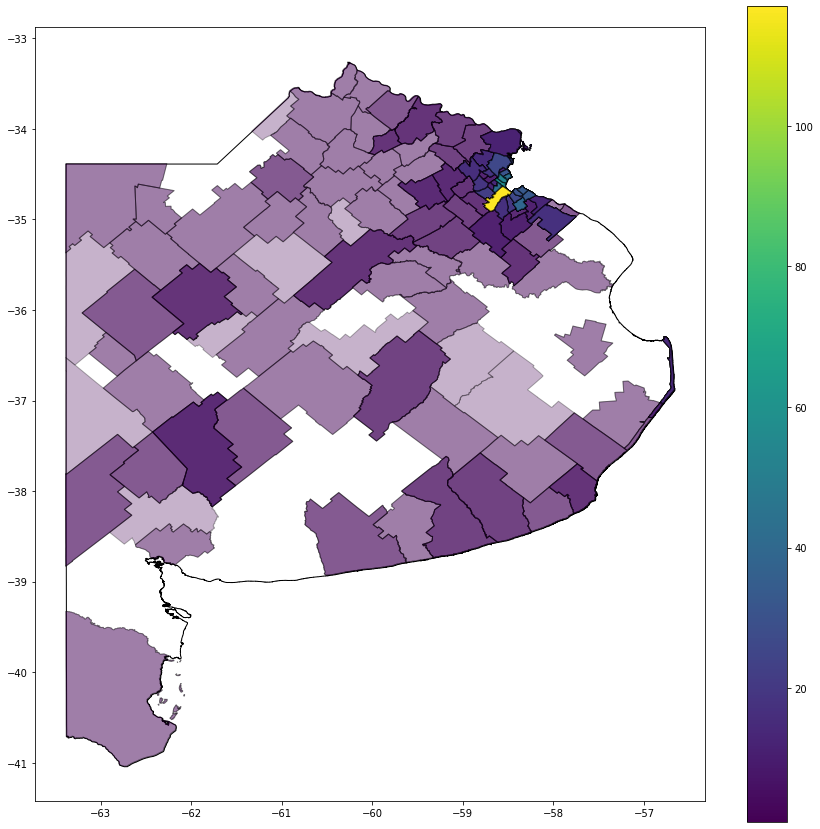

In [360]:
ax = baires.plot(color='white', edgecolor='black', figsize = (15,15))
us_muni_cantidad[us_muni_cantidad.provincia_por_API == 'BUENOS AIRES'].plot( column = 'cantidad', ax = ax, alpha = 0.3,
                                                                            edgecolor = 'k', legend = True)

C:\Users\joaqu\Anaconda3\lib\site-packages\geopandas\plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


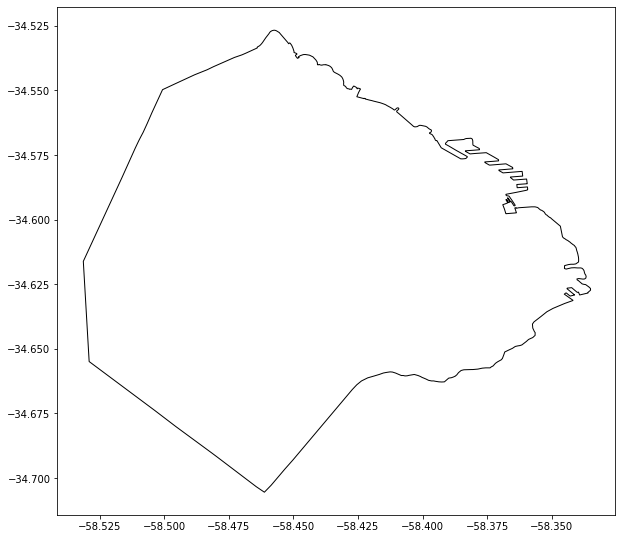

In [361]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
us_muni_cantidad[us_muni_cantidad.provincia_por_API == 'CIUDAD AUTONOMA DE BUENOS AIRES'].plot( column = 'cantidad', ax = ax, alpha = 0.3,
                                                                            edgecolor = 'k', legend = True)

Algo anda mal. Pareceria no haber datos en la Capital Federal.

In [362]:
us_muni_clean.geometry.isna().sum()

0

In [367]:
us_muni_clean[us_muni_clean.provincia_por_API == 'CIUDAD AUTÓNOMA DE BUENOS AIRES']

,nacionalidad,provincia_part,cp_part,loc_part,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,municipio_por_API,departamento_por_API,provincia_por_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,provincia_id_API,departamento_id_API,municipio_id_API,geometry
copy_index,,,,,,,,,,,,,,,,,,,,,,,


In [126]:
us_muni[us_muni.provincia_por_API == 'CIUDAD AUTÓNOMA DE BUENOS AIRES' ]

,nacionalidad,provincia_part,cp_part,loc_part,provincia_por_cp,localidad_por_cp,departamento_por_cp,localidad_por_API,municipio_por_API,departamento_por_API,provincia_por_API,centroide_lat_localidad,centroide_lon_localidad,centroide_lat_municipio,centroide_lon_municipio,centroide_lat_departamento,centroide_lon_departamento,centroide_lat_provincia,centroide_lon_provincia,provincia_id_API,departamento_id_API,municipio_id_API,geometry
copy_index,,,,,,,,,,,,,,,,,,,,,,,
31,AR,NaN,1862,BUENOS AIRES,BUENOS AIRES,NO UNICA LOCALIDAD,None,CIUDAD DE BUENOS AIRES,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6133,-58.3888,NaN,NaN,NaN,NaN,-34.614493,-58.445856,2,None,None,None
33,AR,NaN,1722,BUENOS AIRS,BUENOS AIRES,NO UNICA LOCALIDAD,None,CIUDAD DE BUENOS AIRES,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6133,-58.3888,NaN,NaN,NaN,NaN,-34.614493,-58.445856,2,None,None,None
37,AR,NaN,1414,CABA,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,CABALLITO,NO HUBO REQUEST,COMUNA 6,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6168,-58.4436,NaN,NaN,-34.616843,-58.443568,-34.614493,-58.445856,2,2042,None,None
38,AR,NaN,1425,CABA,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,CABALLITO,NO HUBO REQUEST,COMUNA 6,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6168,-58.4436,NaN,NaN,-34.616843,-58.443568,-34.614493,-58.445856,2,2042,None,None
44,AR,NaN,1217,CAPITAL FEDERAL,CIUDAD AUTONOMA DE BUENOS AIRES,SAN TELMO,COMUNA 1,SAN TELMO,NO HUBO REQUEST,COMUNA 1,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6215,-58.3715,NaN,NaN,-34.606422,-58.371540,-34.614493,-58.445856,2,2007,NaN,None
405,AR,BA,1754,BUENOS AIRES,BUENOS AIRES,NO UNICA LOCALIDAD,None,CIUDAD DE BUENOS AIRES,NO HUBO REQUEST,NO HUBO REQUEST,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6133,-58.3888,NaN,NaN,NaN,NaN,-34.614493,-58.445856,2,None,None,None
412,AR,BA,1424,CABA,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,CABALLITO,NO HUBO REQUEST,COMUNA 6,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6168,-58.4436,NaN,NaN,-34.616843,-58.443568,-34.614493,-58.445856,2,2042,None,None
413,AR,BA,1407,CABA,CIUDAD AUTONOMA DE BUENOS AIRES,NO UNICA LOCALIDAD,NO UNICO DEPARTAMENTO,CABALLITO,NO HUBO REQUEST,COMUNA 6,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6168,-58.4436,NaN,NaN,-34.616843,-58.443568,-34.614493,-58.445856,2,2042,None,None
425,AR,BA,1271,CAPILLA DEL SEÑOR,CIUDAD AUTONOMA DE BUENOS AIRES,BARRACAS,COMUNA 4,BARRACAS,NO HUBO REQUEST,COMUNA 4,CIUDAD AUTÓNOMA DE BUENOS AIRES,-34.6464,-58.3843,NaN,NaN,-34.642079,-58.387455,-34.614493,-58.445856,2,2028,NaN,None


In [134]:
#Veamos si municipios incluye a los barrios de la capital federal
MUNICIPIO[MUNICIPIO.nam == 'Palermo' ]

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry


Necesito obtener las localides (barrios) de Capital Federal.

Necesito agregar id de localidad por API a a base inicial (ya que municipio no es una categoria en Capital)

## Localidades de la Capital Federal

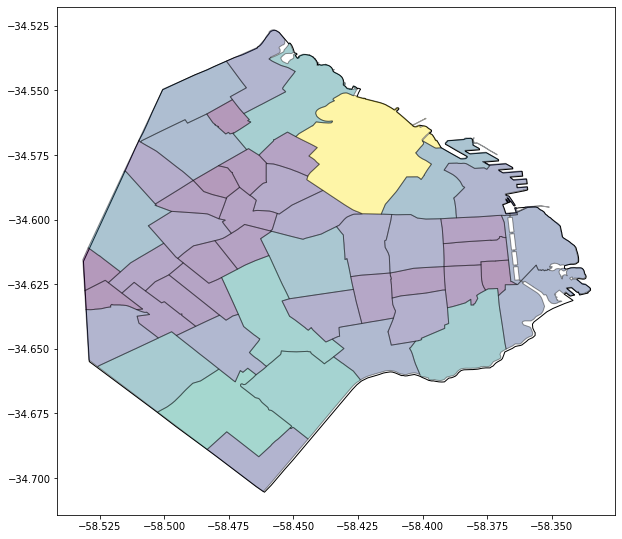

In [395]:
# source: https://data.buenosaires.gob.ar/dataset/barrios
barrios_capital = gpd.read_file('./poligonos/barrios_solo_capital.geojson')
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
barrios_capital.plot(column = 'area', ax = ax, alpha = 0.4, edgecolor = 'k')


In [373]:
# Comunas Capital Federal
# source: https://data.buenosaires.gob.ar/dataset/comunas
comunas_capital = gpd.read_file('./poligonos/CABA_comunas.geojson')
comunas_capital

,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO,geometry
0,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
3,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,"MULTIPOLYGON (((-58.45200 -34.62975, -58.45158..."
4,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,9.0,5,LIMITE COMUNAL,"MULTIPOLYGON (((-58.51925 -34.63301, -58.51908..."
5,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,10.0,6,LIMITE COMUNAL,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820..."
6,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,11.0,7,LIMITE COMUNAL,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718..."
7,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,12.0,8,LIMITE COMUNAL,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347..."
8,PALERMO,22126.531858,1.584587e+07,14.0,9,LIMITE COMUNAL,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676..."
9,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,3.0,10,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41192 -34.59800, -58.41029..."


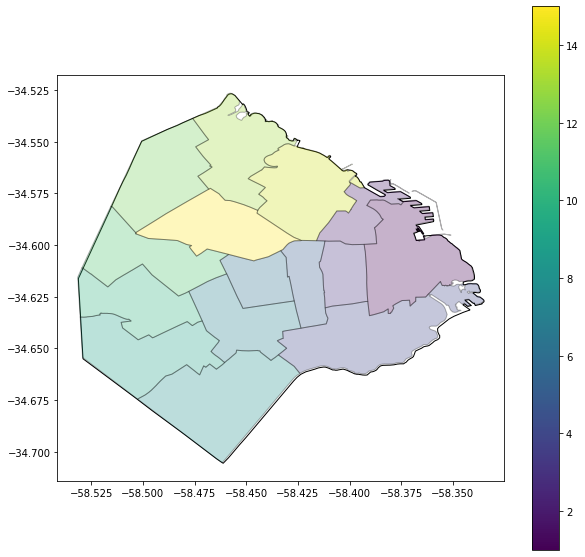

In [374]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
comunas_capital.plot( column = 'COMUNAS', ax = ax, alpha = 0.3, edgecolor = 'k', legend = True)

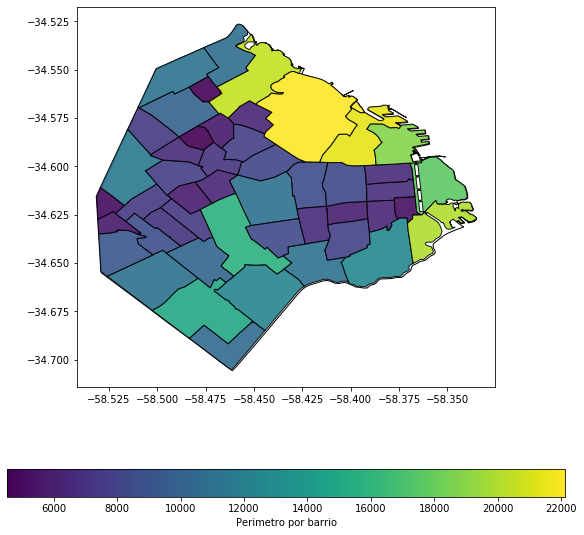

In [424]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
#comunas_capital.plot( ax = ax, alpha = 0.3, edgecolor = 'k', linewidth=3.5)
barrios_capital.plot(column = 'perimetro', ax = ax, alpha = .9, edgecolor = 'k', legend = True,
                     legend_kwds={'label': "Perimetro por barrio", 'orientation': "horizontal"})


In [545]:
geom_list = [shapely.geometry.Point(-58.428409,-34.6062678)]
geom_list

In [580]:
# Probando data points
HI =gpd.GeoDataFrame( { 'Sede' : 'CENTRAL',
                'Provincia' : 'CIUDAD AUTONOMA DE BUENOS AIRES',
                'Provincia_ID' : 2,
                'Localidad' : 'ALMAGRO',
                'Localidad_ID' :  2035010001},
                 geometry = geom_list,
                 index = [0]
                 )
HI

,Sede,Provincia,Provincia_ID,Localidad,Localidad_ID,geometry
0,CENTRAL,CIUDAD AUTONOMA DE BUENOS AIRES,2,ALMAGRO,2035010001,POINT (-58.42841 -34.60627)


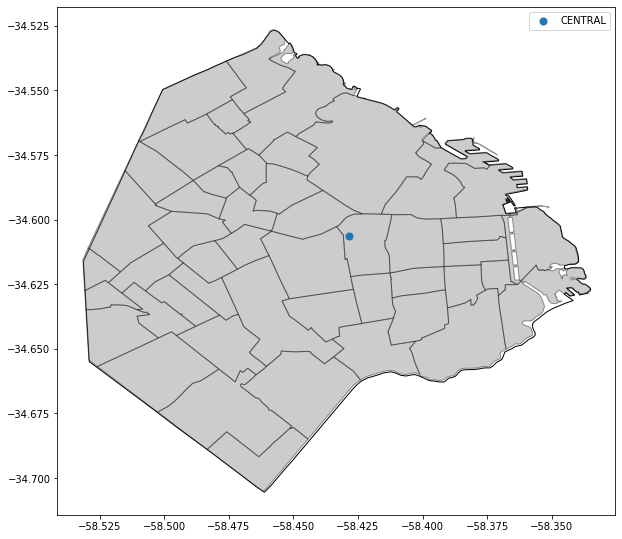

In [582]:
ax = capital.plot(color='white', edgecolor='black', figsize = (10,10))
barrios_capital.plot(column = None, ax = ax, alpha = 0.4, edgecolor = 'k', color = 'grey', legend = True,
                     legend_kwds={'label': "Perimetro por barrio", 'orientation': "horizontal"})
HI.plot(ax = ax , markersize = 50)
plt.legend(HI['Sede'])

In [538]:
HI

,Sede,Provincia,Provincia_ID,Localidad,Localidad_ID,geometry
0,CENTRAL,CIUDAD AUTONOMA DE BUENOS AIRES,2,ALMAGRO,2035010001,POINT (-58.42841 -34.60627)


In [584]:
import geopy.distance as dist

In [635]:
dist.distance((-58.4585, -30.60627),(-58.42840, -34.60627)).km

233.58973595354752

In [636]:
HI.distance(shapely.geometry.Point(-58.4585, -30.60627))

0    4.000111
dtype: float64

In [637]:
a.distance(shapely.geometry.Point(-58.4585, -30.60627))

4.000110981996103

In [639]:
# Vamos a construir un dataset con datos del HI
HI_df = pd.DataFrame( { 'Sede' : ['CENTRAL',]
                'Provincia' : ['CIUDAD AUTONOMA DE BUENOS AIRES',]
                'Provincia_ID' : [2,],
                'Localidad' : ['ALMAGRO',],
                'Localidad_ID' :  [2035010001,]},
                 geometry = geom_list,
                 index = [0]
                 )

SyntaxError: invalid syntax (<ipython-input-639-69cefb16dead>, line 3)

In [833]:
sedes = pd.read_csv('geo_data/SEDES_HI.csv')

In [811]:
sedes

,provincia,prov_id,sede,localidad,comuna,direccion,direccion_detalle,loc_id
0,CIUDAD AUTONOMA DE BUENOS AIRES,2,CABALLITO,CABALLITO,6.0,Juan Bautista Alberdi 439:,NaN,2042010001
1,CIUDAD AUTONOMA DE BUENOS AIRES,2,FLORES 1,FLORES,7.0,Av. Carabobo 148,NaN,2049010001
2,CIUDAD AUTONOMA DE BUENOS AIRES,2,FLORES 2,FLORES,7.0,Nazca 50,NaN,2049010001
3,CIUDAD AUTONOMA DE BUENOS AIRES,2,BARRIO NORTE,RECOLETA,1.0,Paraguay 1559,NaN,2014010001
4,CIUDAD AUTONOMA DE BUENOS AIRES,2,BELGRANO 1,BELGRANO,13.0,Juramento 2739,1ª Piso,2091010001
5,CIUDAD AUTONOMA DE BUENOS AIRES,2,BELGRANO 2,BELGRANO,13.0,Virrey del Pino 2458,1ª Piso,2091010001
6,CIUDAD AUTONOMA DE BUENOS AIRES,2,CENTRO MÉDICO PALPA,COLEGIALES,13.0,Palpa 2680,NaN,2091010002
7,CIUDAD AUTONOMA DE BUENOS AIRES,2,VILLA DEL PARQUE,VILLA DEL PARQUE,11.0,Cuenca 2586,NaN,2077010001
8,CIUDAD AUTONOMA DE BUENOS AIRES,2,VILLA URQUIZA,VILLA URQUIZA,12.0,Olazábal 5382,NaN,2084010004
9,CIUDAD AUTONOMA DE BUENOS AIRES,2,LINIERS,LINIERS,9.0,Av. Rivadavia 11057,NaN,2063010001


In [802]:
locs = []
for loc,prov in zip(sedes.localidad,sedes.provincia):
    data = georefar.get_centroides('localidades',loc, max = 1, provincia = prov)
    locs.append(data)

In [814]:
sedes['loc_id'] = [georefar.getFromDict(x[0],'id') for x in locs]
locs[-1]

[{'categoria': 'Entidad',
  'centroide': {'lat': -34.6626508059016, 'lon': -58.3656990232718},
  'departamento': {'id': '06035', 'nombre': 'Avellaneda'},
  'id': '06035010002',
  'localidad_censal': {'id': '06035010', 'nombre': 'Avellaneda'},
  'municipio': {'id': '060035', 'nombre': 'Avellaneda'},
  'nombre': 'AVELLANEDA',
  'provincia': {'id': '06', 'nombre': 'Buenos Aires'}}]

In [822]:
sedes['latitud'] = None
sedes['longitud'] = None
sedes.drop(columns='geometry', inplace = True)

In [828]:
sedes.to_csv('geo_data/SEDES_HI.csv', index_label=False, index = False)

list